In [ ]:
-------------------------NETFLIX DATA ANALYZING PROJECT--------------------------

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
pip install jupyter-dash pandas plotly

Note: you may need to restart the kernel to use updated packages.


In [33]:
from wordcloud import WordCloud
import plotly.express as px

In [34]:
from jupyter_dash import JupyterDash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px

In [36]:
#Step 1: Load and Clean Data
data = pd.read_csv("C:/Users/Sunil Kannur/OneDrive/Desktop/Unified Mentors/UM_Project/Netflix/netflix1.csv")

In [37]:
print(data.columns.tolist())

['Show_id', 'Type', 'Title', 'Director', 'Country', 'Date_added', 'Release_Year', 'Rating', 'Duration', 'Listed_in']


In [41]:
data = {'Type' : ['Movie', 'TV Show'], 'count': [6126,2664]}
df = pd.DataFrame(data)

In [42]:
df = df.reset_index()

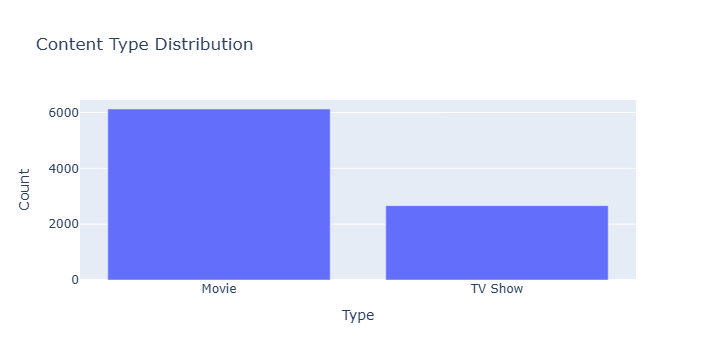

In [43]:
fig = px.bar(df, x='Type', y='count', title='Content Type Distribution', labels={'count': 'Count', 'Type': 'Type'})
fig.show()

In [44]:
# Handle missing values
if isinstance(data, dict):
    data = pd.DataFrame(data)
    
data.replace('Not Given', pd.NA, inplace=True)

In [49]:
data = pd.read_csv("C:/Users/Sunil Kannur/OneDrive/Desktop/Unified Mentors/UM_Project/Netflix/netflix1.csv", header=0)
print(data.head())

  Show_id     Type                             Title         Director  \
0      s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1      s3  TV Show                         Ganglands  Julien Leclercq   
2      s6  TV Show                     Midnight Mass    Mike Flanagan   
3     s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4      s8    Movie                           Sankofa     Haile Gerima   

         Country Date_added  Release_Year Rating  Duration  \
0  United States  9/25/2021          2020  PG-13    90 min   
1         France  9/24/2021          2021  TV-MA  1 Season   
2  United States  9/24/2021          2021  TV-MA  1 Season   
3         Brazil  9/22/2021          2021  TV-PG    91 min   
4  United States  9/24/2021          1993  TV-MA   125 min   

                                           Listed_in  
0                                      Documentaries  
1  Crime TV Shows, International TV Shows, TV Act...  
2                 TV Dr

In [57]:
data.columns = data.columns.str.strip().str.lower()  # Remove spaces & lowercase
if 'date_added' in data.columns:
    data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce', dayfirst=True)
else:
    print("Column 'Date_added' not found!")


In [59]:
print(data.columns)

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')


In [60]:
data.columns = data.columns.str.strip()
print(data.columns)

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')


In [62]:
data['date_added'].fillna(pd.Timestamp('2000-01-01'), inplace=True)

C:\Users\Sunil Kannur\AppData\Local\Temp\ipykernel_12940\3341164554.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [64]:
missing_dates = data[data['date_added'].isna()]
print(missing_dates[['title', 'date_added']])

Empty DataFrame
Columns: [title, date_added]
Index: []


In [65]:
data.dropna(subset=['date_added'], inplace=True)

In [66]:
data['date_added'].fillna(pd.Timestamp('2000-01-01'), inplace=True)

C:\Users\Sunil Kannur\AppData\Local\Temp\ipykernel_12940\3341164554.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [67]:
# Extract numerical values from Duration
data['Duration_num'] = data['duration'].str.extract(r'(\d+)').astype(float)

C:\Users\Sunil Kannur\AppData\Local\Temp\ipykernel_12940\82753010.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




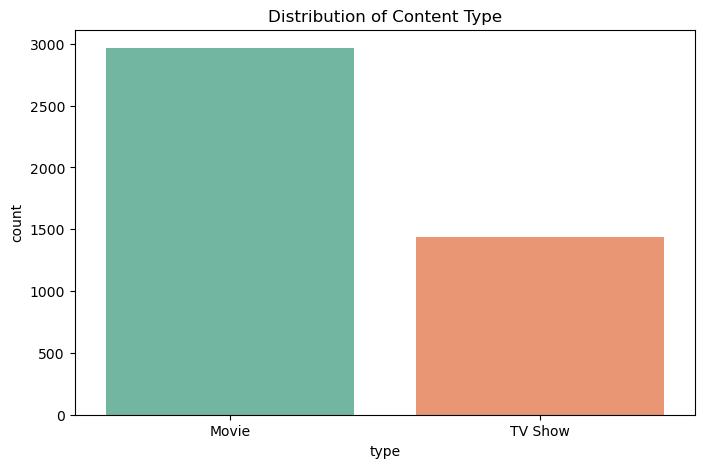

In [69]:
# Step 2: Visualize Content Type Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='type', data=data, palette='Set2')
plt.title('Distribution of Content Type')
plt.show()

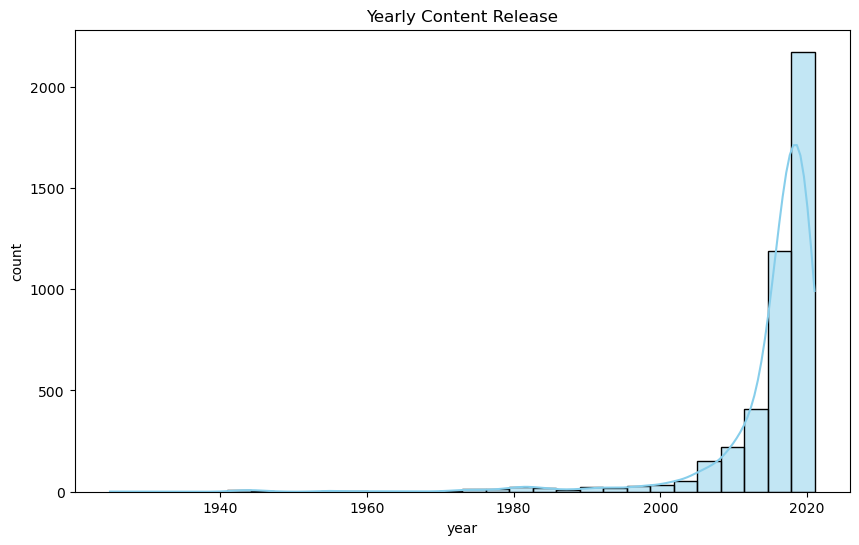

In [70]:
# Step 3: Yearly Releases
plt.figure(figsize=(10, 6))
sns.histplot(data['release_year'], bins=30, kde=True, color='skyblue')
plt.title('Yearly Content Release')
plt.xlabel('year')
plt.ylabel('count')
plt.show()

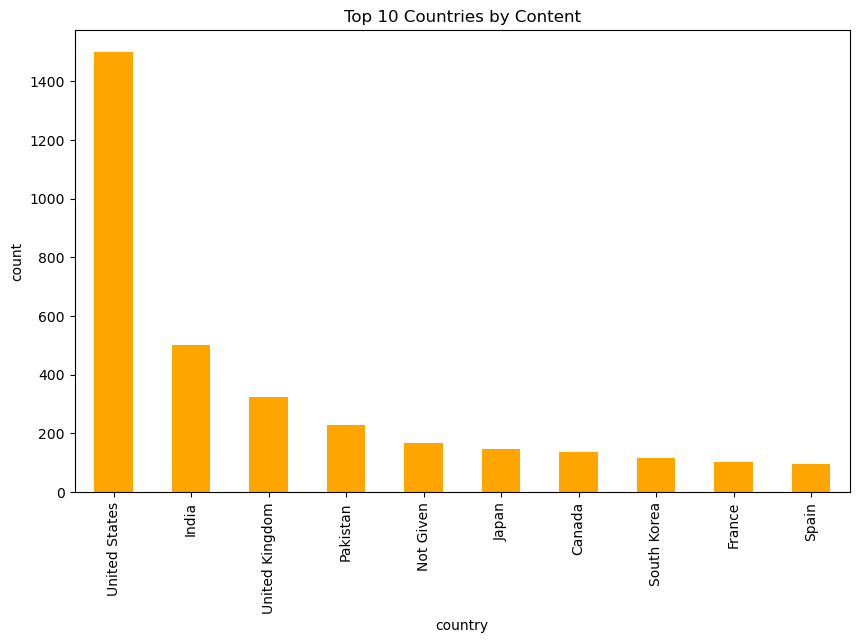

In [71]:
# Step 4: Top 10 Countries by Content
plt.figure(figsize=(10, 6))
top_countries = data['country'].value_counts().head(10)
top_countries.plot(kind='bar', color='orange')
plt.title('Top 10 Countries by Content')
plt.xlabel('country')
plt.ylabel('count')
plt.show()

C:\Users\Sunil Kannur\AppData\Local\Temp\ipykernel_12940\2004194770.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




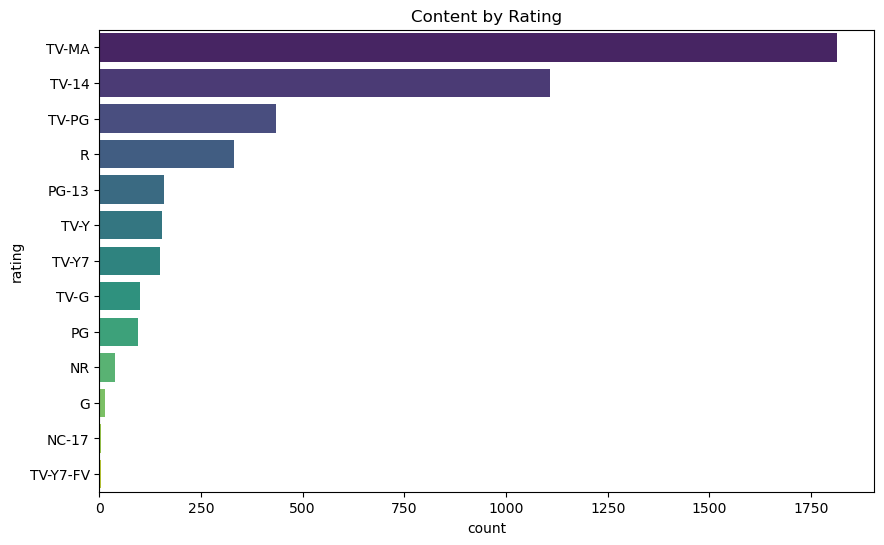

In [72]:
# Step 5: Content by Rating
plt.figure(figsize=(10, 6))
sns.countplot(y='rating', data=data, order=data['rating'].value_counts().index, palette='viridis')
plt.title('Content by Rating')
plt.show()

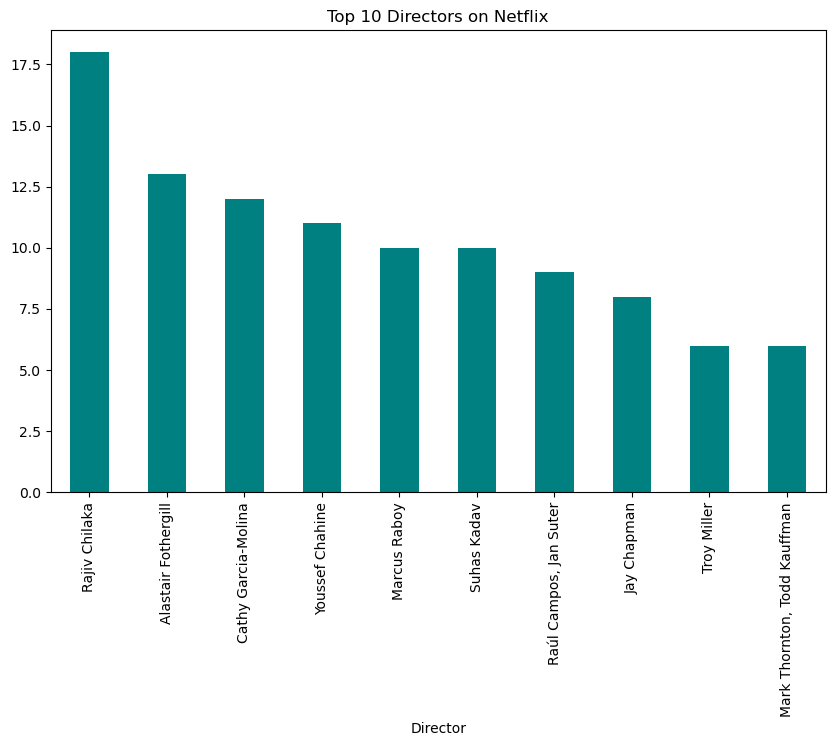

In [14]:
# Step 6: Top Directors
plt.figure(figsize=(10, 6))
top_directors = data['Director'].value_counts().head(10)
top_directors.plot(kind='bar', color='teal')
plt.title('Top 10 Directors on Netflix')
plt.show()

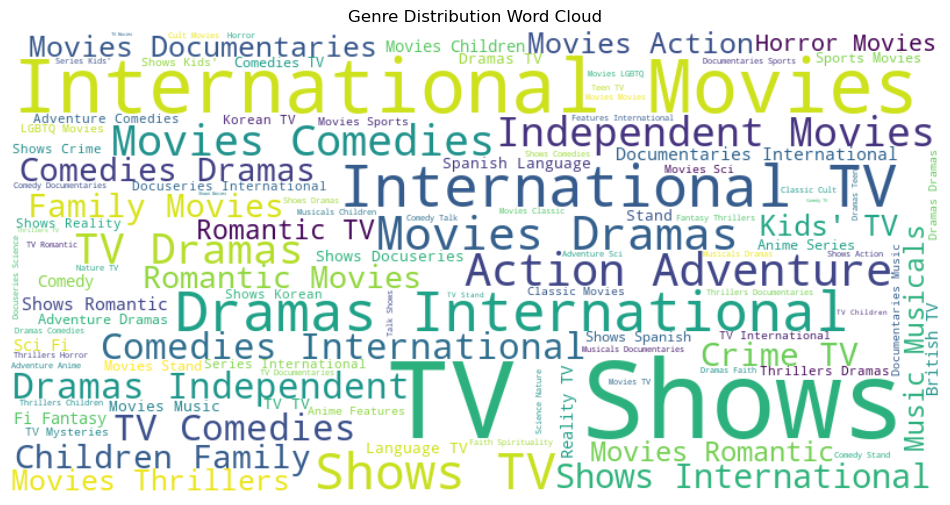

In [73]:
# Step 7: Genre Distribution Word Cloud
plt.figure(figsize=(12, 8))
text = ' '.join(data['listed_in'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Genre Distribution Word Cloud')
plt.show()

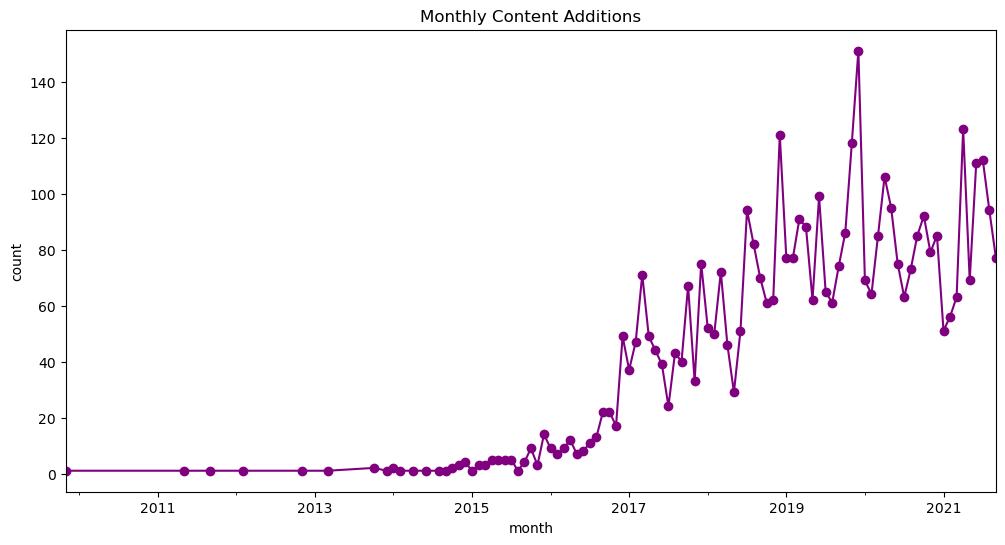

In [74]:
# Step 8: Monthly Content Additions
monthly_addition = data['date_added'].dt.to_period('M').value_counts().sort_index()
plt.figure(figsize=(12, 6))
monthly_addition.plot(kind='line', marker='o', color='purple')
plt.title('Monthly Content Additions')
plt.xlabel('month')
plt.ylabel('count')
plt.show()

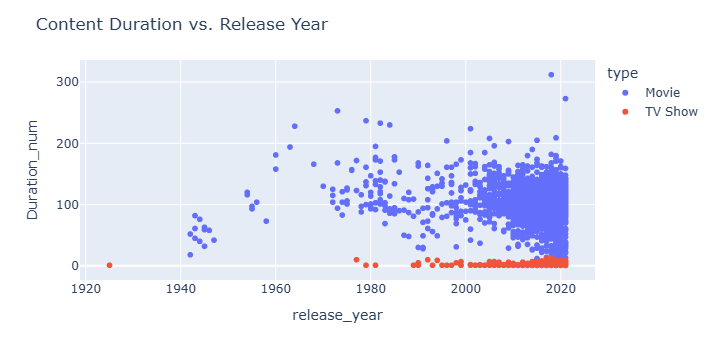

In [77]:
# Step 9: Interactive Scatter Plot (Release Year vs Duration)
fig = px.scatter(data, x='release_year', y='Duration_num', color='type', hover_data=['title'])
fig.update_layout(title='Content Duration vs. Release Year')
fig.show()

<Figure size 1400x800 with 0 Axes>

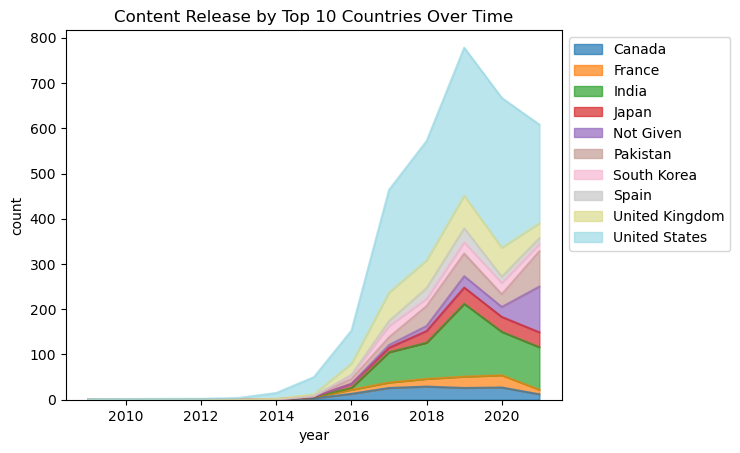

In [78]:
# Step 10: Content by Country Over Time (Top 10 Countries)
top_10_countries = data['country'].value_counts().head(10).index
filtered_data = data[data['country'].isin(top_10_countries)]
country_trend = filtered_data.groupby([filtered_data['date_added'].dt.year, 'country']).size().unstack().fillna(0)
plt.figure(figsize=(14, 8))
country_trend.plot(kind='area', stacked=True, colormap='tab20', alpha=0.7)
plt.title('Content Release by Top 10 Countries Over Time')
plt.xlabel('year')
plt.ylabel('count')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [81]:
# Extract year and month from 'date_added'
data['year_added'] = data['date_added'].dt.year
data['month_added'] = data['date_added'].dt.month

C:\Users\Sunil Kannur\AppData\Local\Temp\ipykernel_12940\203249523.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




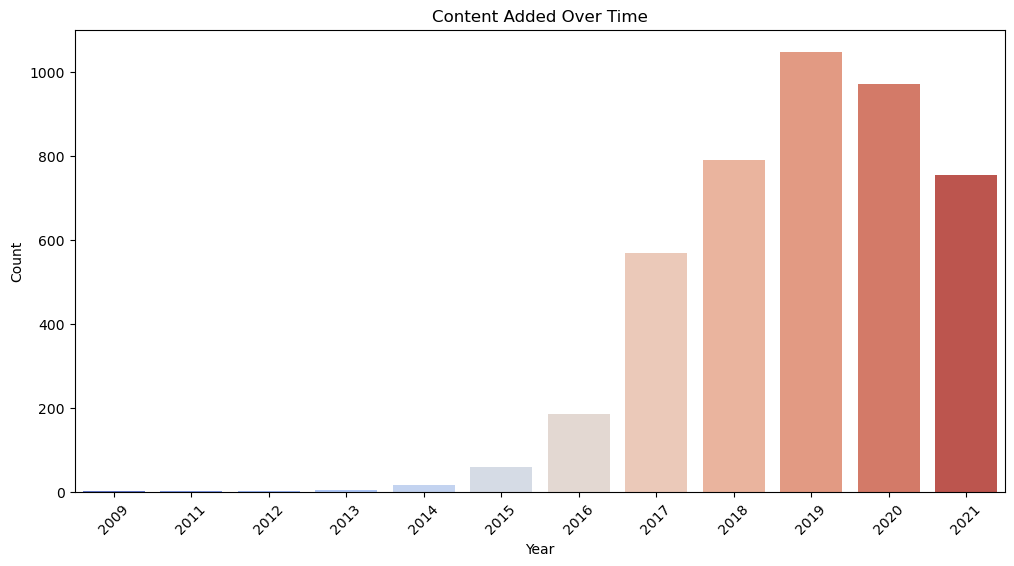

In [82]:
 # Plot content added over the years
 plt.figure(figsize=(12, 6))
 sns.countplot(x='year_added', data=data, palette='coolwarm')
 plt.title('Content Added Over Time')
 plt.xlabel('Year')
 plt.ylabel('Count')
 plt.xticks(rotation=45)
 plt.show()

In [84]:
#Drop rows with missing critical information

data.dropna(subset = ['director', 'title', 'country'], inplace=True)

In [85]:
print(data.dropna)

<bound method DataFrame.dropna of      show_id     type                             title         director  \
0         s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1         s3  TV Show                         Ganglands  Julien Leclercq   
2         s6  TV Show                     Midnight Mass    Mike Flanagan   
3        s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4         s8    Movie                           Sankofa     Haile Gerima   
...      ...      ...                               ...              ...   
8783   s8785    Movie              Yoko and His Friends        Not Given   
8785   s8797  TV Show                        Yunus Emre        Not Given   
8786   s8798  TV Show                         Zak Storm        Not Given   
8787   s8801  TV Show                Zindagi Gulzar Hai        Not Given   
8788   s8784  TV Show                              Yoko        Not Given   

            country date_added  release_year rating  

In [94]:
data = pd.read_csv("C:/Users/Sunil Kannur/OneDrive/Desktop/Unified Mentors/UM_Project/Netflix/netflix1.csv", header=0)
print(data.head())

  Show_id     Type                             Title         Director  \
0      s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1      s3  TV Show                         Ganglands  Julien Leclercq   
2      s6  TV Show                     Midnight Mass    Mike Flanagan   
3     s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4      s8    Movie                           Sankofa     Haile Gerima   

         Country Date_added  Release_Year Rating  Duration  \
0  United States  9/25/2021          2020  PG-13    90 min   
1         France  9/24/2021          2021  TV-MA  1 Season   
2  United States  9/24/2021          2021  TV-MA  1 Season   
3         Brazil  9/22/2021          2021  TV-PG    91 min   
4  United States  9/24/2021          1993  TV-MA   125 min   

                                           Listed_in  
0                                      Documentaries  
1  Crime TV Shows, International TV Shows, TV Act...  
2                 TV Dr

In [95]:
print(data.columns)  # Check the actual column names

Index(['Show_id', 'Type', 'Title', 'Director', 'Country', 'Date_added',
       'Release_Year', 'Rating', 'Duration', 'Listed_in'],
      dtype='object')


In [ ]:
data.columns = data.columns.str.strip()  # Remove spaces

In [ ]:
plt.pie(data['Release_Year'], labels=data['Rating'], autopct='%1.1f%%')

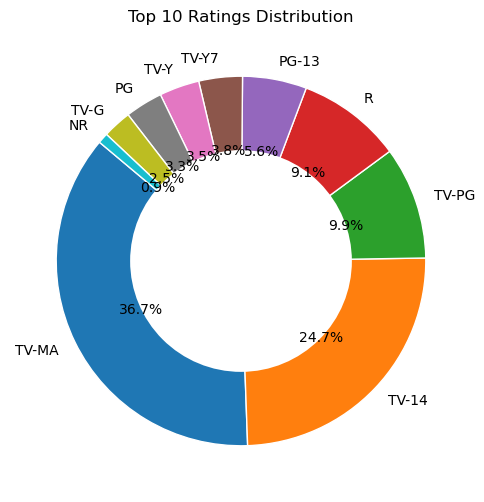

In [102]:
# Group by 'Rating' and count occurrences
grouped_data = data.groupby('Rating').size().reset_index(name='Count')

# Sort by count and select the top 10
top_10_ratings = grouped_data.sort_values(by='Count', ascending=False).head(10)

# Create Donut Chart
plt.figure(figsize=(8, 6))
plt.pie(top_10_ratings['Count'], labels=top_10_ratings['Rating'], autopct='%1.1f%%', 
        startangle=140, wedgeprops={'edgecolor': 'white'})

# Add a white circle in the middle to create a donut shape
centre_circle = plt.Circle((0, 0), 0.6, fc='white')
plt.gca().add_patch(centre_circle)

plt.title('Top 10 Ratings Distribution')
plt.show()